**TMNIST: Prarthana Ganesh Shetty (002833314)**


**Abstract:**
The Typography MNIST (TMNIST) dataset comprises MNIST-style images representing 94 alphabetic characters, including digits from 0 to 9 and a wide range of upper and lower case letters, as well as special characters and symbols. The dataset, containing over 281,000 images, serves as a valuable resource for character recognition tasks. Housed within a single CSV file, each row in the dataset corresponds to an image and its associated label. The CSV file structure includes column headers denoting the image names, labels, and grayscale pixel values. These pixel values represent the visual representation of each character in the specified font style. The TMNIST dataset forms a component of the Warhol.ai Computational Creativity and Cognitive Type projects, offering significant insights and applications in the field of computational creativity and character recognition.

**In this notebook, the TMNIST problem is solved through CNN**
CNN is a series of filters or layers. Each layer looks for different features, like edges or shapes, in the pictures. For example, one layer might focus on finding round shapes, while another looks for straight lines.

As the picture goes through each layer, the network learns more about it. It starts with the basic features, like edges, and gradually builds up to more complex ones, like ears or tails. Eventually, the network makes a guess about what's in the picture based on all the features it found.

CNNs are incredibly useful because they can automatically learn what features are important for distinguishing between different objects.
One of the key components of CNNs is the convolutional layer. These layers apply a series of filters to input images, aiming to identify specific patterns or features such as edges, shapes, or textures. Through the process of convolution, the network learns to extract relevant features from the input data, facilitating accurate classification.

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


In [26]:
df = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The code below prepares a dataset for training a machine learning model by extracting pixel values and labels, converting categorical labels into numerical format using LabelEncoder, reshaping the pixel values into a format suitable for CNN input, and splitting the data into training and testing sets with an 80-20 split.

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Extract pixel values and labels
X = df.iloc[:, 2:].values
y = df['labels'].values

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Reshape and normalize pixel values
X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The code below utilizes Matplotlib to visualize the image data stored in the variable X_train[21]. It displays the image using the imshow() function, providing a graphical representation of the image at index 21 in the training dataset.

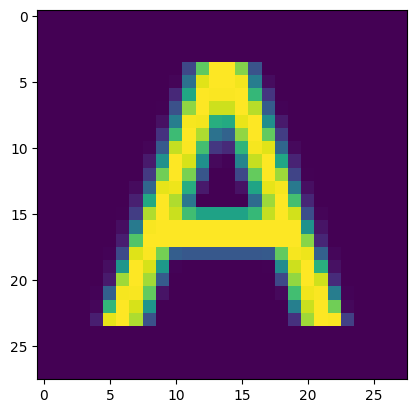

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X_train[21])

**CNN**

A CNN processes an image through a series of layers, each designed to recognize different elements of the image:

Convolution Layer: Think of this as the layer that applies various filters to highlight features such as edges or specific shapes. It's like using a flashlight to illuminate certain parts of the image.

Pooling Layer: This layer downscales the image, making it smaller and easier to process. It's similar to stepping back to see the bigger picture, focusing only on the most important details.

Fully Connected Layer: After we've highlighted features and simplified the image, these layers act like detectives, putting together all the clues to make a final decision about what's in the image.


![img](http://d14b9ctw0m6fid.cloudfront.net/ugblog/wp-content/uploads/2020/12/1-4.png)

CNN works in two main phases: feature extraction and classification.

Feature Extraction:

Input: It starts with the input image, which the model sees just as an array of pixel values.
Convolution: Then, the CNN applies various filters to this image to create "feature maps." This is like finding patterns, such as edges or textures, within the image.
Pooling: Next, the network simplifies these feature maps by pooling or summarizing them, often by taking the most prominent features from small regions.
Classification:

Fully Connected Layers: After the network has identified the key features within an image, these are fed into a series of layers that are fully connected, meaning each neuron in one layer is connected to every neuron in the next layer.
Output: The final layer in a CNN is the output layer, where it decides what the image shows. For example, if it's a picture of an alphabet, the CNN determines which letter it is.
Overall, the CNN's job is to take an image and understand it well enough to make accurate decisions about what it contains.

The code below builds a Convolutional Neural Network (CNN) model using Keras. The model architecture consists of two convolutional layers with 32 and 64 filters respectively, followed by max-pooling layers to downsample the feature maps. Then, the feature maps are flattened and passed through a fully connected layer with 128 neurons, followed by a dropout layer to prevent overfitting. Finally, the output layer with a softmax activation function is added to classify the input images into different classes.

The model is compiled with the sparse categorical cross-entropy loss function, the Adam optimizer, and accuracy as the metric. It is then trained on the training data (`X_train` and `y_train`) for 10 epochs with a batch size of 128. The validation data is taken from a 10% split of the training data for monitoring the model's performance during training. The training history is stored in the variable `history` for further analysis.

In [29]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.1)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.5849 - loss: 1.6270 - val_accuracy: 0.8726 - val_loss: 0.3960
Epoch 2/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.8405 - loss: 0.5227 - val_accuracy: 0.8922 - val_loss: 0.3280
Epoch 3/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.8663 - loss: 0.4367 - val_accuracy: 0.9102 - val_loss: 0.2782
Epoch 4/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.8836 - loss: 0.3783 - val_accuracy: 0.9153 - val_loss: 0.2607
Epoch 5/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.8925 - loss: 0.3491 - val_accuracy: 0.9211 - val_loss: 0.2468
Epoch 6/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.9014 - loss: 0.3170 - val_accuracy: 0.9262 - val_loss: 0.2290
Epoch 7/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9065 - loss: 0.2999 - val_accuracy: 0.9293 - val_loss: 0.2213
Epoch 8/10
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.9101 

In [30]:
# Step 5: Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 93.36%


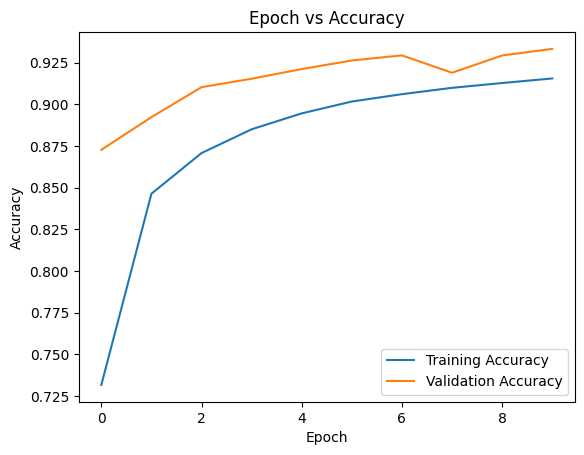

In [31]:
import matplotlib.pyplot as plt

# Plot epoch vs accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graph displays the performance of our Convolutional Neural Network (CNN) during training over 10 epochs. The blue line represents the training accuracy, and the orange line represents the validation accuracy. As the number of epochs increases, the training accuracy consistently rises, suggesting that the model is learning and adapting well to the training dataset. The validation accuracy also increases but does so with some fluctuation, which is common as the model attempts to generalize the features learned from the training data to the unseen validation data.

The graph indicates a positive learning trend, with both training and validation accuracy improving over successive epochs. The model's training accuracy shows it's effectively learning from the data, and the validation accuracy's upward trajectory suggests it's also generalizing well to new, unseen data, which is a hallmark of a well-performing model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


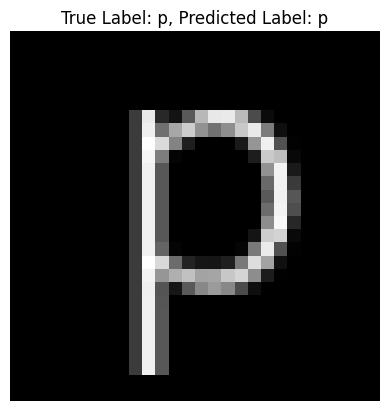

In [35]:
import random
import matplotlib.pyplot as plt

# Choose a random sample from the test set
index = random.randint(0, len(X_test) - 1)
sample_image = X_test[index]
sample_label = y_test[index]

# Reshape the image to match the model input shape
sample_image = np.expand_dims(sample_image, axis=0)

# Make predictions
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)

# Decode the predicted label
predicted_char = label_encoder.inverse_transform([predicted_label])[0]

# Plot the sample and its prediction
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {label_encoder.inverse_transform([sample_label])[0]}, Predicted Label: {predicted_char}")
plt.axis('off')
plt.show()

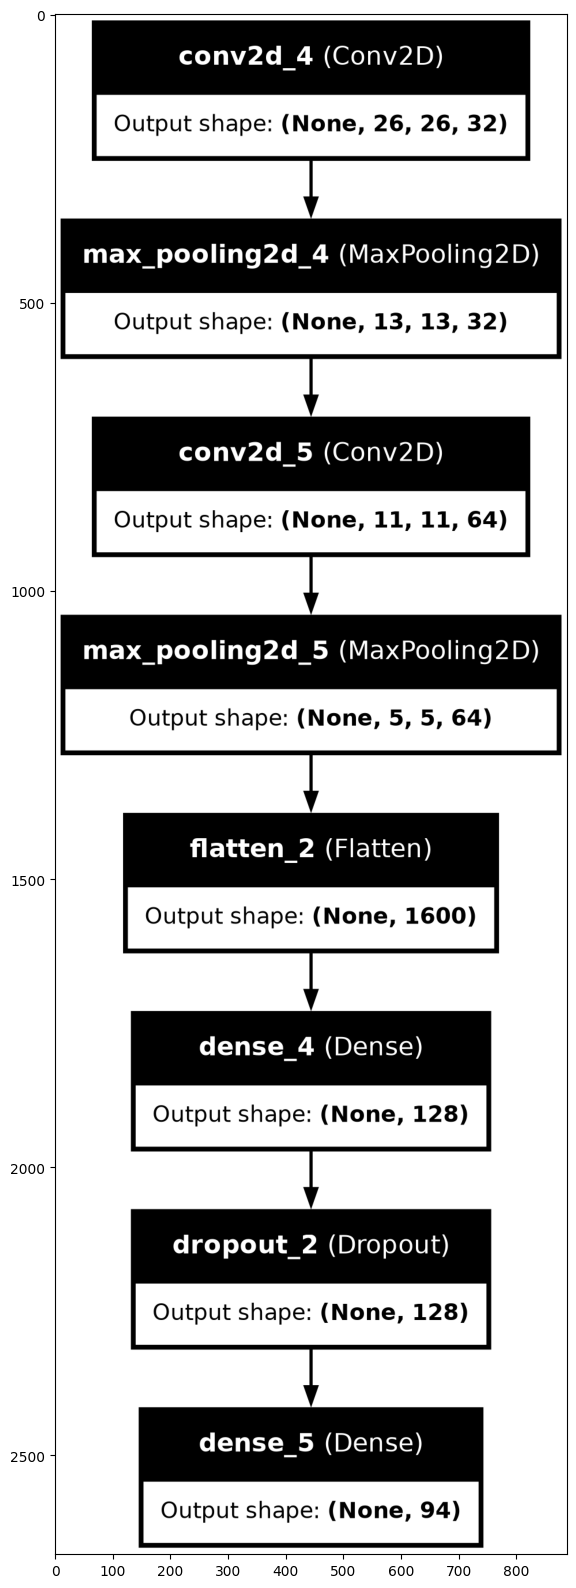

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg

# Generate the plot
tf.keras.utils.plot_model(model, to_file ='cnn_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('cnn_plot.png')
plt.figure(figsize=(30,20))
imgplot = plt.imshow(img)

**Conclusion/Summary**


In this TMNIST-focused project, we successfully employed a Convolutional Neural Network (CNN) to tackle the complex task of recognizing a diverse array of typographic characters. The CNN demonstrated its powerful feature extraction capabilities, progressively refining its accuracy over the training process. Notably, the model showcased a commendable balance between learning from the training set and generalizing to the validation set, with a final test accuracy of 93.6% which serves the goal of achieving an accuracy of 90% and above.

Overall, this notebook encapsulates a robust approach to character recognition, harnessing the strengths of CNNs to decode nuanced patterns within typographic data. The resulting high accuracy underscores the potential of CNNs in advancing computational creativity and cognitive type endeavors within the vast realm of machine learning applications.

**LICENSE**

MIT License

Copyright (c) 2024 prarthanashetty29

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.